## Исследование данных о российском кинопрокате



## Цель исследования

В рамках данного исследования необходимо выполнить:

1. Корректно объединить два датафрейма.

2. Изменить тип данных в столбцах, в которых это необходимо.

3. Заполнить пропуски в столбцах, в которых это возможно.

4. Изучить и при необходимости устранить дубликаты.

5. Проанализировать категорированные столбцы.

6. Проанализировать количественные столбцы.

7. Добавить новые столбцы:

    - `premiere_year` - год премьеры фильма;
    - `main_director` - ФИО главного режиссера;
    - `main_genres` - основной жанр фильма.
    - `state_support_share` - доля государственной поддержки от общего бюджета.
    
    
8. Провести исследовательский анализ:

    - Проанализировать количество премьер за каждый год.
    - Проанализировать количество фильмов, у которых известны общие сборы, за каждый год.
    - Проанализировать минимальные и максимальные значения сборов за каждый год.
    - Проанализировать средние значения сборов за каждый год.
    - Проанализировать влияние возрастного ограничения на итоговые сборы.
    
9. Провести исследовательский анализ фильмов, получивших государственную поддержку:

    - Анализ сборов и окупаемости.
    - Анализ рейтингов фильмов.
    - Анализ каждого источника финансирования.
    
    
10. Написать общий вывод.

## Ход исследования

### Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

В первую очередь импортируем необходимые библитеки и с помощью метода `read_csv` запишем датафреймы `mkrf_movies` и `mkrf_shows` в переменные `df_movies` и `df_shows` соответсвенно.

In [1]:
#импорт библиотек pandas, matplotlib и seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#запись датафрейма mkrf_movies в переменную df_movies
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
#запись датафрейма mkrf_movies в переменную df_shows
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
#вывод первых 5 строк датафрейма df_movies
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
#вывод первых 5 строк датафрейма df_shows
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Теперь выведем общую информацию по каждому датафрейму.

In [6]:
#вывод общей информации по датафрейму df_movies
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [7]:
df_movies.describe()

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


In [8]:
#вывод общей информации по датафрейму df_shows
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [9]:
df_shows.describe()

,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
max,2.240264e+08,3.073569e+09


В сводной информации по каждому датафрейму нас больше всего интересует столбец `puNumber`, так как по нему будет происходить соединение двух датафреймов. Видим, что в датафрейме `df_movies` столбец `puNumber` имеет тип `object`, а в датафрейме `df_shows` - тип `int`.
При объединении датафреймов такое различие типов данных вызовет ошибку, поэтому необходимо преобразовать столбец `puNumber` в датафрейме `df_movies` в тип `int`.

Выясним, какое значение в столбце `puNumber` датафрейма `df_movies` приводит с типу `object`, а не к более логичному для данного столбца типу `int`. Для этого специально вызовем ошибку путем изменения типа столбца `puNumber` методом `astype('int')` и посмотрим какое значение является недопустимым.

In [10]:
#специальный вызов ошибки для просмотра недопустимых значений
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

ValueError: invalid literal for int() with base 10: 'нет'

In [11]:
#выявление количества значений "нет" в столбце puNumber датафрейма df_movies
df_movies[df_movies['puNumber'] == 'нет']['title'].count()

1

Видим, что в в столбце `puNumber` датафрейма `mkrf_movies` присутствует значение "нет", из-за которого весь столбец преобразуется в тип `object`. Не будем удалять данное значение и заменим его на -1. Далее попробуем изменить тип на `int`.

In [12]:
#изменение значения "нет" на -1
df_movies.loc[df_movies['puNumber'] == 'нет', 'puNumber'] = -1

In [13]:
#изменение типа данных столбца puNumber
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

In [14]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 877.4+ KB


Мы успешно изменили тип данных и теперь нам ничего не мешает объединить датафреймы `df_movies` и `df_shows` по столбцу `puNumber` с помощью метода `merge`.

Так как необходимо, чтобы все значения `df_movies` попали в итоговый датафрейм и к ним присоединились соответствующие значения датафрейма `df_shows`, то укажем в параметре `how` значение `left`.

In [15]:
#Объединение датафреймов
df = df_movies.merge(df_shows, how = 'left', on = 'puNumber')

In [16]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Выведем общую статистику по объединенному датафрейму `df`.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


In [18]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


#### Вывод

После объединения датафреймов можно сказать, что столбцы соответствуют описанию к задаче. Столбцы имеют следующие значения:

- `title` — название фильма;


- `puNumber` — номер прокатного удостоверения;


- `show_start_date` — дата премьеры фильма;


- `type` — тип фильма;


- `film_studio` — студия-производитель;


- `production_country` — страна-производитель;


- `director` — режиссёр;


- `producer` — продюсер;


- `age_restriction` — возрастная категория;


- `refundable_support` — объём возвратных средств государственной поддержки;


- `nonrefundable_support` — объём невозвратных средств государственной поддержки;


- `financing_source` — источник государственного финансирования;


- `budget` — общий бюджет фильма;


- `ratings` — рейтинг фильма на КиноПоиске;


- `genres` — жанр фильма;


- `box_office` — сборы в рублях.

Смотря на статистику, в некоторых столбцах можно сразу выявить 2 проблемы:

- несоответствия типов данных;

- пропущенные значения.

С помощью метода `describe` не удалось выявить каких-то явных аномалий в данных.

По итогу можно сказать, что данных достаточно для проведения исследований, заявленных в целях данного проекта.

### Предобработка данных

#### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

В первом пукте исследования мы выявили, что в некоторых столбах необходимо изменить тип данных. Такими столбцами являются:

- `show_start_date` (из object в datetime);


- `refundable_support` (из object в int);


- `nonrefundable_support` (из object в int);


- `ratings` (из object во float);


- `budget` (из object в int).

##### Изменение типа данных в столбце `show_start_date`

Для дальнейших операций с полем `show_start_date` его необходимо привести к типу `datetime`. Для этого сперва проанализируем текущий формат записи даты и времени.

In [19]:
#просмотр формата записи даты
df['show_start_date']

0       2015-11-27T12:00:00.000Z
1       2016-09-13T12:00:00.000Z
2       2016-10-10T12:00:00.000Z
3       2016-06-10T12:00:00.000Z
4       2015-07-29T12:00:00.000Z
                  ...           
7481    2019-12-23T12:00:00.000Z
7482    2019-12-24T12:00:00.000Z
7483    2019-12-28T12:00:00.000Z
7484    2019-12-30T12:00:00.000Z
7485    2019-12-30T12:00:00.000Z
Name: show_start_date, Length: 7486, dtype: object

Видим, что дата является очень громоздкой и неудобной для анализа, так как такой формат записи включает в себя ряд ненужных символов, а также время, которое всегда равно 00:00.000. Поэтому применим метод `to_datetime`, чтобы обозначить работу именно с датой и далее с помощью метода `date` уберем время, оставив только дату.

In [20]:
#удаление времени из даты
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.date

In [21]:
#проверка формата записи
df['show_start_date']

0       2015-11-27
1       2016-09-13
2       2016-10-10
3       2016-06-10
4       2015-07-29
           ...    
7481    2019-12-23
7482    2019-12-24
7483    2019-12-28
7484    2019-12-30
7485    2019-12-30
Name: show_start_date, Length: 7486, dtype: object

При этом тип данных у поля `show_start_date` остался object. Для смены типа данных на `datetime` применим метод `to_datetime` и укажем в параметрах следующи формат записи `'%Y-%m-%d'`.

In [22]:
#преобразование из типа object в тип datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%d')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 994.2+ KB


Мы успешно изменили тип данных на `datetime`.

##### Изменение типа данных в столбцах `refundable_support`, `nonrefundable_support` и `budget`

Для дальнейших арифметических операций со столбцами `refundable_support`, `nonrefundable_support` и `budget` необходимо преобразовать их из типа `object` в тип `int`.

Данные столбцы будут преобразовываться по одному и тому же алгоритму, поэтому необходимо создать функцию `type_change` для оптимизации всего процесса.

Создадим список с названиями интересующих нас столбцов и поочереди применим к ним методы `fillna` (заполним пропуски значением -1) и `astype('int')`.

In [24]:
#создание функции для изменения типа данных
def type_change(list):
    for i in list:
        df[i] = df[i].fillna(-1).astype('int') #применение к каждому столбцу из списка методов fillna и astype

In [25]:
#создание списка интересующих нас столбцов
columns_list = ['refundable_support', 'nonrefundable_support', 'budget']

In [26]:
#применение фукции к столбцам из списка
type_change(columns_list)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(10)
memory usage: 994.2+ KB


Успешно изменили тип данных в столбцах `refundable_support`, `nonrefundable_support` и `budget`.

##### Изменение типа данных в столбце `ratings`

Изменим тип данных в столбце `ratings` с `object` на `float`. Для этого применим метод `to_numeric`, который преобразует указанный в параметрах столбец в тип `float`. В параметре `errors` запишем значение `raise`. Это значит, что при наличии в столбце `ratings` значения, которое невозможно преобразовать в тип `float`, будет выводиться ошибка.

In [28]:
#изменение типа данных с object на float
df['ratings'] = pd.to_numeric(df['ratings'], errors = 'raise')

ValueError: Unable to parse string "99%" at position 259

Видим, что возникла ошибка из-за значения "99%", которое имеет тип `object`. Некоторые пользователи оценивали фильм в процентах, а не по десятибалльной шкале. Посмотрим сколько пользователей оценили фильмы в процентах с помощью метода `str.contains`. Этот метод поможет выявить все фильмы, в оценке которых встречается символ "%".

In [29]:
#проверка количества рейтингов, указанных в процентах
df[df['ratings'].str.contains('%', na=False)]['ratings'].count()

29

Видим, что рейтинги 29 фильмов указаны в процентах. Удалять данные строки может быть опасно для последующих результатов анализа, поэтому постараемся конвертировать эти рейтинги в десятибалльную шкалу.

Для этого создадим функцию, которая будет выполнять следующие действия:

- Отрезать знак процента на конце рейтинга. Тут нам поможет взятие среза от 0 до последнего индекса.

- Преобразовывать значение в тип int.

- Делить это значение на 10, для получения рейтинга в формате десятибалльной шкалы.

Далее необходимо произвести замену значения, записанного в процентах, на значение, выраженное в десятибалльной шкале. Для этого выполним следующие действия:
    
- Создадим новый датафрейм `df_percent`, в котором будут содержаться только строчки с процентным рейтингом.

- Путем применения функции `percent_trans` к столбцу `ratings` создадим в нем новый столбец `num_ratings`.

- С помощью одинаковых индексов выполним замену процентных рейтингов в датафрейме `df` на рейтинги столбца `num_ratings`.

In [30]:
#создание функции, преобразовывающей процентный рейтинг в рейтинг десятибальной шкалы
def percent_trans(percent):
    return int(percent[0: -1]) / 10

In [31]:
#создание датафрейма df_percent, в котором все строчки содержат процентный рейтинг
df_percent = df[df['ratings'].str.contains('%', na=False)]

In [32]:
df_percent.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,-1,-1,-1,NaN,28%,"детский,приключения,комедия",1740.0
1053,Песочный человек,121029212,2012-11-29,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,-1,-1,-1,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,-1,-1,-1,NaN,99%,"аниме,мультфильм,ужасы",4295.0


In [33]:
#применение функции percent_trans к столбцу ratings и создание столбца num_ratings
df_percent.loc[:, 'num_ratings'] = df_percent['ratings'].apply(percent_trans)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
df_percent['num_ratings']

259     9.9
811     2.8
1053    9.7
1341    9.9
1805    9.9
1874    8.3
1899    6.4
2126    9.1
2146    9.4
2438    6.2
2680    7.9
3139    9.0
3431    1.9
3439    8.8
3446    8.3
3514    9.1
3585    9.7
3786    8.9
3948    9.7
5332    8.8
5455    8.3
5821    9.4
5910    9.4
6426    9.1
6616    9.8
6737    9.8
6882    9.9
7159    7.9
7277    8.8
Name: num_ratings, dtype: float64

In [35]:
#замена процентных рейтингов на значения, выраженные в десятибалльной шкале
df.loc[df_percent.index, 'ratings'] = df_percent['num_ratings']

In [36]:
#проверка наличия процентных рейтингов
df[df['ratings'].str.contains('%', na=False)]['title'].count()

0

Мы устронили все процентные рейтинги и теперь наконец-то можем изменить тип данных столбца `ratings` на float с помощью все той же функции `to_numeric`.

In [37]:
#изменение типа данных
df['ratings'] = pd.to_numeric(df['ratings'], errors = 'raise')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 1.3+ MB


Теперь мы устранили все пропуски.

#### Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим еще раз статистику по всему датафрейму и определим список столбцов, в которых присутствуют пропуски.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 1.3+ MB


Столбцы, в которых присутствуют пропуски:

- film_studio;

- production_country;

- director;

- producer;

- financing_source;

- ratings;

- genres;

- box_office.

Заполним пропуски в столбцах: `film_studio`, `production_country`, `director`, `producer`, `genres` на значение "Unknown". Сделаем это действие с помощью разработанной функции.

In [40]:
#функция для заполнения пропусков
def na_filling(list):
    
    for i in list:
        
        df[i] = df[i].fillna('Unknown')

In [41]:
#столбцы, в которых необходимо заполнить пропуски
columns_for_filling = ['film_studio', 'production_country', 'director', 'producer', 'genres']

In [42]:
#применение функции заполнения пропусков к необходимым столбцам
na_filling(columns_for_filling)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7486 non-null object
production_country       7486 non-null object
director                 7486 non-null object
producer                 7486 non-null object
age_restriction          7486 non-null object
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   7486 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 1.3+ MB


Заменяя пропуски в столбцах `ratings` и `box_office`, мы рискуем исказить результаты анализа, поэтому лучше их не трогать.


В следующих столбцах мы проставили значение -1 вместо пропусков для того, чтобы изменить тип данных:

- refundable_support;

- nonrefundable_support;

- budget.

При дальнейшей работе с фильмами, которые получали государственную поддержку, будем использовать фильтр `df['refundable_support'] != -1`.

#### Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

В первую очередь необходимо проверить на наличие явных дубликатов. Для этого применим метод `duplicate` к всему датафрейму.

In [44]:
#выявление явных дубликатов
df.duplicated().sum()

0

Явных дубликатов в датафрейме не обнаружено, но возможно существуют неявные дубликаты. Попробуем применить метод `duplicated` к одному из ключевых столбцов датафрейма - `title`.

In [45]:
#выявление дубликатов по полю title
df['title'].duplicated().sum()

714

Данный случай уже более интересный. Видим, что по столбцу названия фильма существует 714 дубликатов. Однако, здесь необходимо учитывать, что фильмы могут иметь одинаковые названия, но при этом сниматься разными режиссерами или один фильм может являться ремейком другого и тогда это уже 2 разных фильма.

В данном случае актуален вопрос идентификации каждого фильма, а именно какое сочетание полей способно однозначно определить список уникальных фильмов в датафрейме. Попробуем выявить дубликаты по названию фильма и по режиссёру.

In [46]:
df[['title', 'director']].duplicated().sum() #666 c продюсером #676 без продюсера, 683 без типа

683

Количество дубликатов уменьшилось на 31.

Теперь проанализируем, являются ли корректными эти 683 значения или будет лучше убрать их из датафрейма.

In [47]:
df[(df[['title', 'director']].duplicated() == True)].head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,-1,-1,-1,NaN,8.2,"фэнтези,приключения,семейный",1125302.0
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.9,"фэнтези,приключения,семейный",843310.0
132,Джейн Эйр /По одноименному роману Шарлотты Бро...,221035716,2016-06-07,Художественный,"Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...",Франция - Италия - Великобритания - США,Франко Дзеффирелли,Unknown,«12+» - для детей старше 12 лет,-1,-1,-1,NaN,7.4,"драма,мелодрама",NaN
205,Кинг Конг _,221001815,2015-02-11,Художественный,"Биг Праймейт Пикчерз, Юниверсал Пикчерз, ВингН...",Новая Зеландия - США,Питер Джексон,"Йен Бленкин, Питер Джексон, Кэролайн Каннингэм...",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.6,"боевик,драма,мелодрама",NaN
268,Пуленепробиваемый.,121009103,2013-03-13,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайн...",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,-1,-1,-1,NaN,6.7,"фэнтези,боевик,комедия",NaN
379,Рапунцель: Запутанная история,224026712,2012-10-23,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,-1,-1,-1,NaN,7.9,"мультфильм,мюзикл,фэнтези",NaN


Для примера возьмем фильм "Дом грёз". Выполним анализ и выясним, почему этот фильм не вошел в выборку `df.duplicated()`.

In [48]:
#анализ строк "Дом грёз"
df[df['title'] == 'Дом грёз']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
385,Дом грёз,221005815,2015-02-25,Художественный,"Клиффджек Моушн Пикчерз, Морган Крик Продакшнз",США,Джим Шеридан,"Дэниэл Бобкер, Эхерн Крюгер, Джеймс Г.Робинсон...",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.6,"драма,криминал",NaN
386,Дом грёз,221031312,2012-04-26,Художественный,"Клиффджек Моушн Пикчерз, Морган Крик Продакшнз",США,Джим Шеридан,"Дэниэл Бобкер, Эхерн Крюгер, Джеймс Г.Робинсон...",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.6,"драма,криминал",NaN
5085,Дом грёз,121017511,2011-09-21,Художественный,"Клиффджек Моушн Пикчерз, Морган Крик Продакшнз",США,Джим Шеридан,"Дэниэл Бобкер, Эхерн Крюгер, Джеймс Г.Робинсон...",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.6,"драма,криминал",NaN
5340,Дом грёз,221114711,2011-11-11,Художественный,"Клиффджек Моушн Пикчерз, Морган Крик Продакшнз",США,Джим Шеридан,"Дэниэл Бобкер, Эхерн Крюгер, Джеймс Г.Робинсон...",«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.6,"драма,криминал",NaN


У данного фильма существует 4 строки во всем датафрейме. Они отличаются только по полям `puNumber` и `show_start_date`, то есть можно утверждать, что эти неявные дубликаты образовались из-за того, что премьеры фильма "Дом грёз" состоялись в разные периоды времени под разными прокатными удостоверениями.

Рассмотрим также пример с фильмом "Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/".

In [49]:
df[df['title'] == 'Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
121,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,221004816,2016-02-09,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.9,"фэнтези,приключения,семейный",NaN
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.9,"фэнтези,приключения,семейный",843310.0
4426,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,221134410,2010-11-29,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,-1,-1,-1,NaN,7.9,"фэнтези,приключения,семейный",NaN


Видим, что здесь ситуация почти аналогичная, но для строчки №122 известны сборы фильма.

Необходимо также проверить существуют ли дубли по полям `title`, `director` и `puNumber`.

In [50]:
#проверка дубликатов по полям 'title', 'director' и 'puNumber'
df[['title', 'director', 'puNumber']].duplicated().sum()

0

Как мы видим таких фильмов нет, а иначе можно было бы задуматься о некорректных данных.

По данному исследованию, можно сделать вывод, что удаление выявленных неявных дубликатов может привести к искажению результатов исследования, например, в исследовании определения количества фильмов, презентуемых в каждом году. Если в ходе исследования будет необходимо работать только с уникальными фильмами, тогда создадим новый датафрейм, в который перенесем необходимую информацию по каждому уникальному фильму.

#### Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7486 non-null object
production_country       7486 non-null object
director                 7486 non-null object
producer                 7486 non-null object
age_restriction          7486 non-null object
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   7486 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 1.3+ MB


Выделим все категориальные столбцы в датафрейме:

- type;

- film_studio;

- production_country;

- director;

- producer;

- age_restriction;

- financing_source;

- genres.

Выполним анализ данных столбцов с помощью метода `value_counts`.

Так как весь алгоритм данного исследования - это повторение одних и тех же действий, создадим функцию `column_stat`, которая будет применять необходимый метод к каждому столбцу из списка.

In [52]:
#создание списка столбцов, к которым будет применяться метод value_counts
columns_list = ['type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']

In [53]:
#создание функции для применения метода value_counts к каждому столбцу
def column_stat(list):
    
    for i in list:
        
        display(f'Столбец {i}', df[i].value_counts())

In [54]:
column_stat(columns_list)

'Столбец type'

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

'Столбец film_studio'

Киностудия "Мосфильм"                                                   341
ООО "Мульт в кино"                                                       57
Анимаккорд Лтд                                                           23
Unknown                                                                  18
ООО "Мульт в кино"                                                       18
                                                                       ... 
Паншинг Биз, Треверс Медиа, Фасеншен Филмз                                1
Йедко Филмз                                                               1
ООО "Пропеллер продакшн, НП "Интерфест", ООО "Компания "РЕАЛ-ДАКОТА"      1
ЗАО "Фитиль-Проект"                                                       1
Канал + Эспана, Зета Аудивижуал, Антена 3 Фильм, Ла Секста                1
Name: film_studio, Length: 5491, dtype: int64

'Столбец production_country'

США                                    2172
Россия                                 1821
СССР                                    347
Франция                                 301
Великобритания                          257
                                       ... 
Франция-Великобритания-Чехия              1
Великобритания - Испания - Германия       1
Дания-Швеция-Франция-Германия             1
США - Канада - Индонезия                  1
Италия, Германия                          1
Name: production_country, Length: 951, dtype: int64

'Столбец director'

О.Семёнова                     47
Стивен Содерберг               17
Д.Червяцов                     17
Ридли Скотт                    16
Тиль Швайгер                   14
                               ..
Хьюго Желен                     1
Н.Климчук, О.Морозова           1
Крис Джеро, Тони Кинг           1
К.Шахназаров, А.Бородянский     1
Стив Бенделэк                   1
Name: director, Length: 4812, dtype: int64

'Столбец producer'

Unknown                                                    568
П.Смирнов                                                   67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина               28
С.Сельянов                                                  18
Д.Ловейко, О.Кузовков                                       17
                                                          ... 
В.Кречетова, А.Васильев                                      1
Марен Аде, Йонас Дорнбах, Мишель Меркт, Янина Яковски        1
В.Поляков, Г.Андреасян, С.Андреасян                          1
Ален Вулф, Дэвид Остин                                       1
Ричард Рионда Дель Кастро, Майкл Мендельсон, Джим Эгнью      1
Name: producer, Length: 5350, dtype: int64

'Столбец age_restriction'

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

'Столбец financing_source'

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

'Столбец genres'

Unknown                            976
драма                              476
комедия                            352
мелодрама,комедия                  222
драма,мелодрама,комедия            189
                                  ... 
драма,спорт,история                  1
боевик,история                       1
документальный,криминал,военный      1
триллер,фэнтези                      1
триллер,драма,ужасы                  1
Name: genres, Length: 743, dtype: int64

Насколько мы можем видеть, присутствует ряд замечаний.

Во-первых, столбец `type` содержит в себе неявные дубликаты. В нем содержатся значения, такие как "Художественный" и " Художественный", "Анимационный" и " Анимационный", то есть значения, в которых первым элементом является пробел, что, конечно, некорректно.

Во-вторых, столбцы: `film_studio`, `production_country`, `director producer`, `genres` содержат в себе слишком много уникальных значений. Это происходит из-за большого количества коллабораций киностудий, стран, продюсеров при создании фильмов, а также из-за смешения различных жанров. Этот факт способен усложнить анализ, например, нам необходимо выявить самый популярный жанр кино, при таком количестве уникальных жанров сделать это исследование будет проблематично.

Свою роль категориальных переменных на 100% выполняют столбцы: `type` (если в нем исправить некорректные значения), `financing_source`, `age_restriction`. В них содержатся относительно малое количество категорий.

Изменим некорректные значения в столбце `type`. Для этого с помощью метода `loc` достанем все строки, в которых значения в столбце `type` равны " Художественный" и " Анимационный" и далее изменим их на корректыне.

In [55]:
#изменения некорректных значений " Художественный" в столбце type
df.loc[df['type'] == ' Художественный', 'type'] = 'Художественный'

In [56]:
#изменения некорректных значений " Анимационный" в столбце type
df.loc[df['type'] == ' Анимационный', 'type'] = 'Анимационный'

In [57]:
#проверка изменений значений в столбце type 
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Мы успешно скорректировали значения в столбце `type`, а также обнаружили, что в ряде категориальных столбцов существует проблема большого количества уникальных значений.

Теперь необходимо проверить количественные столбцы.

#### Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Выделим количественные столбцы:

- refundable_support;

- nonrefundable_support;

- budget;

- box_office.

Давайте еще раз прочитаем описание столбцов, в которых содержится информация о государственной поддержке.

"Обратите внимание, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку."

То есть должно выполняться следующее условие `(df['budget'] < (df['refundable_support'] + df['nonrefundable_support']))`. Проверим так ли это.

In [58]:
#проверка количества строк, в которых не выполняется условие
df[(df['budget'] < (df['refundable_support'] + df['nonrefundable_support']))]['title'].count()

17

Видим, что существует 17 значений, в которых не выполняется необходимое условие. Проанализируем данные значения более детально.

In [59]:
#вывод строк, в которых не выполняется ключевое условие
df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,5.6,фантастика,1.038321e+09


Видим, что во всех строках, в которых не выполняется ключевое условие, общий бюджет фильма равен 0. Посмотрим сколько всего значений с `df['budget'] == 0`.

In [60]:
#проверка количества значений, в которых budget = 0
df[df['budget'] == 0]['title'].count()

17

Количество строк, в которых `df['budget'] == 0`, числено равно количеству строк, в которых `df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])`. Похоже, у государсвенных фильмов, у которых неизвестен общий бюджет, пропуски решили закрыть значением 0. Также не будем удалять эти строки, а при необходимости отфильтруем их.

#### Добавьте новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Выделим год из даты примьеры фильма с помощью метода `year` и запишем эти значения в новый столбец `premiere_year`.

In [61]:
#выделение года из даты премьеры фильма и запись этих значений в новый столбец premiere_year
df['premiere_year'] = pd.DatetimeIndex(df['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Для создания столбцов с именем и фамилией главного режиссёра и основным жанром фильма создадим функцию `add_columns`, которая будет разделять каждое значение по символу "," и после разделения брать нулевой (по факту первый) элемент.

In [62]:
#функция для выделения первого значения в столбцах director и genres
def add_columns(value):
    return value.split(',')[0]

In [63]:
#применение функции add_columns и запись возвращаемого значения в новый столбец main_director
df['main_director'] = df['director'].apply(add_columns)

In [64]:
#применение функции add_columns и запись возвращаемого значения в новый столбец main_genres
df['main_genres'] = df['genres'].apply(add_columns)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Для выявления доли государственной поддержки в общем бюджете фильма создадим отдельную функцию `state_support_share`, которая будет принимать на вход строчку датафрейма. Далее в этой строчке будут выделяться значения значения `budget`, `refundable_support` и `nonrefundable_support`. Если значения `budget` равно -1 (фильмы без господдержки) или 0 (госфильмы с неизвестным итоговым бюджетом), тогда возвращаем в качестве доли государственной поддержки значение -1. В ином случае возвращаем `(df['refundable_support'] + df['nonrefundable_support']) / df['budget']`.

In [65]:
def state_support_share(row):
    
    #выделение значений budget, refundable_support, nonrefundable_support из переданной строчки
    budget = row['budget']
    refundable_support = row['refundable_support']
    nonrefundable_support = row['nonrefundable_support']
    
    #отработка случая, когда фильм не получал господдержку или у госфильма неизвестен итоговый бюджет
    if budget == -1 or budget == 0:
        return -1
    
    #возвращение доли государственной поддержки в общем бюджете фильма
    return (refundable_support + nonrefundable_support) / budget

Для обозначения того факта, что функция будет применяться построчно применим аргумент `axis = 1`.

In [66]:
#применение построчной функции state_support_share и запись значений в новый столбец
df['state_support_share'] = df.apply(state_support_share, axis = 1)

In [67]:
#проверка создания новых столбцов
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,premiere_year,main_director,main_genres,state_support_share
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,-1,-1,-1,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,-1.0
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,-1,-1,-1,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,-1.0
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,-1.0
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,-1.0
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,-1.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 20 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7486 non-null object
production_country       7486 non-null object
director                 7486 non-null object
producer                 7486 non-null object
age_restriction          7486 non-null object
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   7486 non-null object
box_office               3158 non-null float64
premiere_year            7486 non-null int64
main_director            7486 non-null object
main_genres              7486 non-null object
state_support_s

### Проведите исследовательский анализ данных

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

#### Анализ количества примьер за каждый год

В первую очередь проанализируем количество фильмов в разрезе каждого года. Для этого создадим отдельный датафрейм `df_group_by_year`, в который запишем группировку значений по столбцу `premiere_year` с применением метода `count`.

In [69]:
#создание сводной таблицы с помощью метода groupby по столбцу premiere_year
df_group_by_year = df.groupby('premiere_year')[['title']].count()

In [70]:
#проверка создания сводной таблицы
df_group_by_year

,title
premiere_year,
2010,985
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505
2018,891


In [71]:
#переименование столбца title на film_number
df_group_by_year = df_group_by_year.rename({'title' : 'film_number'}, axis = 'columns')

Отсортируем значения количества фильмов по убыванию.

In [72]:
#вывод отсортированных значений количества фильмов по годам
df_group_by_year['film_number'].sort_values(ascending = False).to_frame()

,film_number
premiere_year,
2010,985
2019,930
2018,891
2016,818
2014,807
2015,705
2013,630
2011,622
2012,593


Для еще более комфортного анализа построим бар-диграмму количества фильмов по годам.

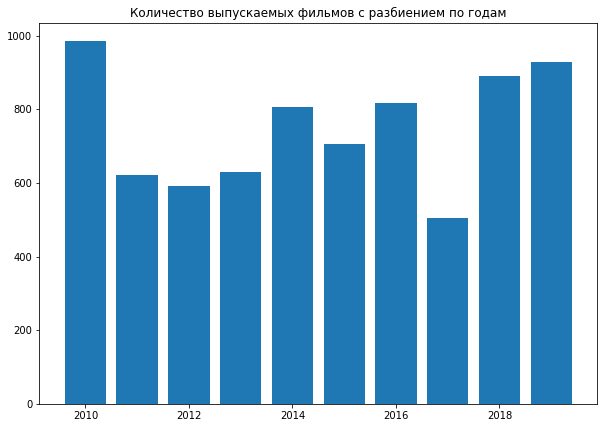

In [73]:
#создание графика bar chart
plt.figure(figsize=(10, 7))
plt.bar(df_group_by_year.index, df_group_by_year['film_number'])
plt.title('Количество выпускаемых фильмов с разбиением по годам')
plt.show()

На диаграмме хорошо видно, что среди лидеров по выпускаемым фильмам находится 2010, 2019, 2018 года. При этом значения количества выпускаемых фильмов скачет каждый год. Например, 2010 год является лидером, но в последующие года (2011 и 2012) количество выпускаемых фильмов сильно сократилось. То же самое с 2019 и 2018 годами. Они находятся среди лидеров, но при этом в 2017 году был самый низкий показатель количества премьер. 

В данном случае нельзя сказать, что с развитием индустрии кино количество премьер становится больше. Наоборот, как будто в период с 2011 по 2017 года люди в кино индустрии стали делать акцент на качестве и не переполнять рынок новыми премьерами (это лишь гипотеза). Но в 2018 и в 2019 ситуация начала изменяться и почти достигла показателей 2010 года.

Здесь, конечно, интересно посмотреть как количество премьер изменилось в 2020 и в 2021 годах, так как ковид-19 очень сильно повлиял на всю индустрию кино.

#### Выявление доли фильмов, по которым указана информация о прокате в кинотеатрах

Для дальнейших исследований посчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Такая информация содержится в столбцах `puNumber` и `box_office`. Помним, что в столбце `puNumber` был один пропуск, который мы заменили на -1. В столбце `box_office` ситуация хуже, так как в нем присутствует всего 3158 значений. Таким образом доля фильмов, для которых указана информация о прокате в кинотеатрах составляет 42%:

In [74]:
(3158 / 7486) * 100

42.185412770504946

Безусловно, выборка сильно сократилась, но возникает вопрос в корректности оставшихся 42%. Выполним первичный анализ поля `box_office` с помощью метода `describe`.

In [75]:
df['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

Возникает 2 претензии к данным:
1. Минимальное значение сборов равно 0, что в принципе можно прировнять к пропуску.
2. Огромная величина стандартного отклоения (240 353 100).

Проанализируем поле `box_office` более детально и выясним почему данный столбец имеет такое огромное стандартное отклонение.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Создадим сводную таблицу `box_office_stat`, в которую запишем группировку строк по столбцу `premiere_year` и применим к данной группировке функции `count`, `min`, `max`, `mean`, `median` и `std`. Для группировки возьмем только те строки, в которых значение `box_office`не является пропуском и не равно 0.

In [76]:
#создание сводного датафрейма с помощью метода pivot_table 
box_office_stat = (
    
    df[~(df['box_office'].isna()) & (df['box_office'] != 0)]
    
                   .pivot_table(index = 'premiere_year',
                                values = 'box_office',
                                aggfunc = ['count', 'min', 'max', 'mean', 'median', 'std'])
                  )

In [77]:
#с помощью функции set_axis сменим названия столбцов для комфортного анализа
(
    box_office_stat
    .set_axis(['count', 'min', 'max', 'mean', 'median', 'std'], axis = 'columns', inplace=True)
)

In [78]:
box_office_stat

,count,min,max,mean,median,std
premiere_year,,,,,,
2010,101,75.0,1.446400e+06,2.404608e+04,1710.000,1.461387e+05
2011,109,125.0,1.161808e+07,1.293832e+05,3000.000,1.114447e+06
2012,123,80.0,2.311220e+06,5.654815e+04,6220.000,2.336668e+05
2013,179,40.0,1.995703e+07,1.664788e+05,3580.000,1.525590e+06
2014,273,50.0,1.016411e+09,2.727089e+07,20400.000,1.223247e+08
2015,462,100.0,1.658861e+09,8.549213e+07,5003450.150,2.207714e+08
2016,525,200.0,2.048126e+09,9.117390e+07,3915041.020,2.512522e+08
2017,357,7900.0,2.779686e+09,1.360328e+08,9968340.000,3.232514e+08
2018,475,41225.0,2.271754e+09,1.045651e+08,8891102.210,2.720790e+08


#### Анализ количества премьер с известными сборами в разрезе каждого года

Видим, что результаты исследования по значениям столбца `box_office`, которые не равны 0 и не являются пропуском, сильно отличаются от результатов исследования по общему количеству строк.

Построим график общего количества премьер в разрезе каждого года и график количества премьер с известными сборами рядом и выполним их анализ.

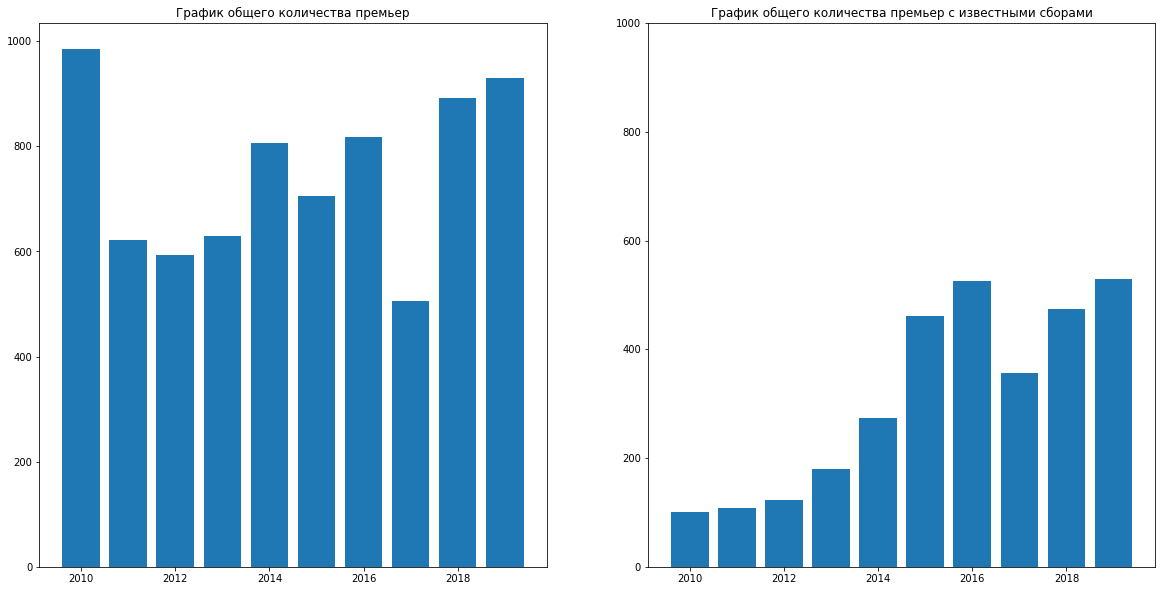

In [79]:
#создание фигуры с размерами 20 на 10

fig = plt.figure(figsize=(20,10))

#добаление новых сабплотов в фигуру
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#построение bar-графика на каждом сабплоте
ax1.bar(df_group_by_year.index, df_group_by_year['film_number'])
ax2.bar(box_office_stat.index, box_office_stat['count'])

#обозначение названия графиков
ax1.set_title('График общего количества премьер')
ax2.set_title('График общего количества премьер с известными сборами')

#присваение новых значений по оси Y для второго графика
ax2.set_yticks([0, 200, 400, 600, 800, 1000])

plt.show()

В прошлом исследовании по количеству премьер за каждый год мы выяснили, что 2010 год является единоличным лидером (985 значений), но таблица `box_office_stat` показывает, что количество известных сборов в 2010 году самое минимальное (101).

Видно, что значение количества известных сборов плавно возрастает из года в год (исключением является 2017 год), но большинство значений остается неизвестным. Начиная с 2015 года, количество сборов остается на более менее стабильном уровне (462 - 530).

#### Анализ минимальных и максимальных значений сборов в разрезе каждого года

Выведем еще раз столбцы `min` и `max` из сводной таблицы `box_office_stat`.

In [80]:
box_office_stat[['min', 'max']]

,min,max
premiere_year,,
2010,75.0,1.446400e+06
2011,125.0,1.161808e+07
2012,80.0,2.311220e+06
2013,40.0,1.995703e+07
2014,50.0,1.016411e+09
2015,100.0,1.658861e+09
2016,200.0,2.048126e+09
2017,7900.0,2.779686e+09
2018,41225.0,2.271754e+09


В данном случае значения также кажутся подозрительными. С 2010 по 2013 года значения максимума и минимума сборов кажутся сильно урезанными. Есть ощущение, что до 2014 года значения сборов записывались не в рублях, а в долларах. После 2013 года ситуация меняется, например, в 2014 году минимальное значение сборов остается на уровне предыдущих лет, но максимальное значение в разы больше предыдущих и сопоставимо со значениями 2017-2019 годов. В 2015 году ситуация закрепляется, так как количество известных сборов сильно увеличилось (273 - в 2013, 462 - в 2015). Минимальное значение в 2015 году не особо сопоставимо со значениями 2017-2019 годов, но максимальное значение становится значительно больше и закрепляет рост показателя максимума сборов.

Для итоговых выводов выполним анализ средних величин сборов в разрезе каждого года.

#### Анализ средних величин сборов в разрезе каждого года

- Изучите среднее арифметическое и медиану проката за каждый год.

Еще раз выведем столбцы `mean` и `median` для детального анализа.

In [81]:
box_office_stat[['mean', 'median', 'std']]

,mean,median,std
premiere_year,,,
2010,2.404608e+04,1710.000,1.461387e+05
2011,1.293832e+05,3000.000,1.114447e+06
2012,5.654815e+04,6220.000,2.336668e+05
2013,1.664788e+05,3580.000,1.525590e+06
2014,2.727089e+07,20400.000,1.223247e+08
2015,8.549213e+07,5003450.150,2.207714e+08
2016,9.117390e+07,3915041.020,2.512522e+08
2017,1.360328e+08,9968340.000,3.232514e+08
2018,1.045651e+08,8891102.210,2.720790e+08


Построим столбчатые диаграммы столбцов `mean`, `median` и `std` для более комфортного визуального анализа с помощью собственной функции `bar_building`.

In [82]:
#создание функции, которая на вход принимает список необходимых столбцов
def bar_building(list):
    
    #создание цикла for для перебора всех столбцов из списка
    for i in list:

        #создание фигуры размером 10 на 7 для каждого графика
        fig = plt.figure(figsize=(10,7))
        
        #отрисовка столбчатой диаграммы по столбцу i
        plt.bar(box_office_stat.index, box_office_stat[i])

        #создание заголовка
        plt.title(f'Столбчатая диаграмма столбца {i}')

        plt.show()

In [83]:
#список необходимых столбцов.
columns_list = ['mean', 'median', 'std']

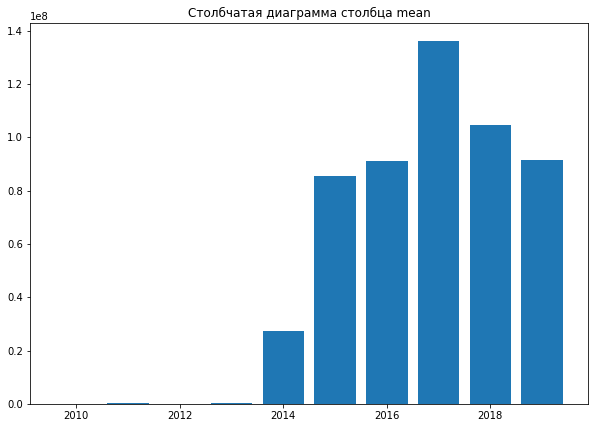

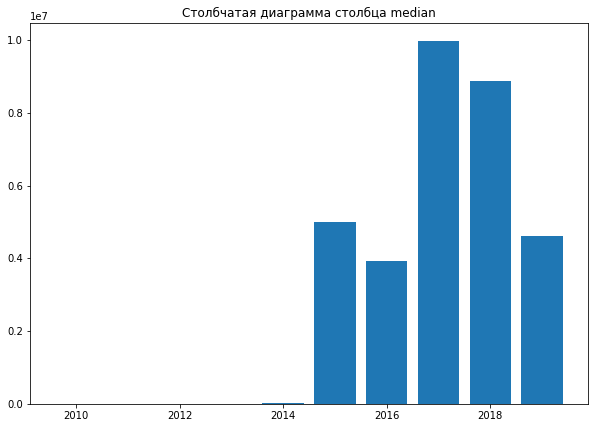

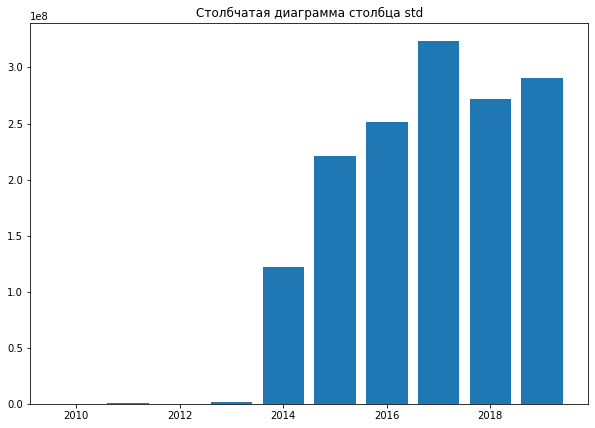

In [84]:
#применение функции bar_building к созданному списку столбцов 
bar_building(columns_list)

С помощью диаграмм мы очередной раз можем убедиться, что с данными за 2010-2014 года что-то не так. Средние величины за эти года даже близко не конкурируют со средними величинами за 2015-2019 года. Возможно, в дальнейших исследованиях для формулировки более корректных результатов стоит рассматривать данные за 2015-2019 года отдельно от всех.

По графикам также можно сделать вывод, что самыми удачными в плане сборов были 2017 и 2018 года, хотя число фильмов с известными сборами за 2017 год одно из самых минимальных (357 значений). Видимо, по этой причине стандартное отклонение сборов за 2017 год самое большое за все представленные года. График стандартного отклонения показывает, что 2017 год хоть и был самым удачным в плане сборов, но такое большое значение достигается не за счет большинства фильмов с плюс-минус равными большими сборами, а за счет нескольких фильмов, с относительно огромными сборами, которые сильно завышают среднее значение. Точно такая же ситуация и с 2019 годом, у которого хорошие средние сборы, но относительно низкая медиана и значение стандартного отклонения одно из самых больших. Можно сказать, что 2018 год был самым ровным в плане сборов. У него хорошие показатели среднего арифметического и медианы, а также показатель среднего отлонения уступает 2017 и 2019 годам.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

#### Анализ влияния возрастного ограничения аудитории на сборы фильмов

Для проведения анализа о влиянии возрастного ограничения на сборы фильма создадим новую сводную таблицу `stat_age_restriction`, в которую запишем группировку по столбцу `age_restriction`. Для каждого возрастного ограничения посчитаем среднее количество сборов.

In [85]:
#создание сводной таблицы для подсчета среднего арифметического для каждого возрастного ограничения
stat_age_restriction = (
    
    df[(df['box_office'] != 0) & (df['premiere_year'] >= 2015)]
    
    .pivot_table(index = 'age_restriction',
                 values = 'box_office',
                 aggfunc = ['mean'])
)

In [86]:
#изменение названий столбцов
(
    stat_age_restriction
    .set_axis(['mean'],
              axis = 'columns',
              inplace = True)
)

In [87]:
stat_age_restriction

,mean
age_restriction,
«0+» - для любой зрительской аудитории,8.989749e+06
«12+» - для детей старше 12 лет,1.746958e+08
«16+» - для детей старше 16 лет,9.468834e+07
«18+» - запрещено для детей,5.146416e+07
«6+» - для детей старше 6 лет,1.760209e+08


Построим столбчатую диаграмму для наглядности результатов.

<BarContainer object of 5 artists>

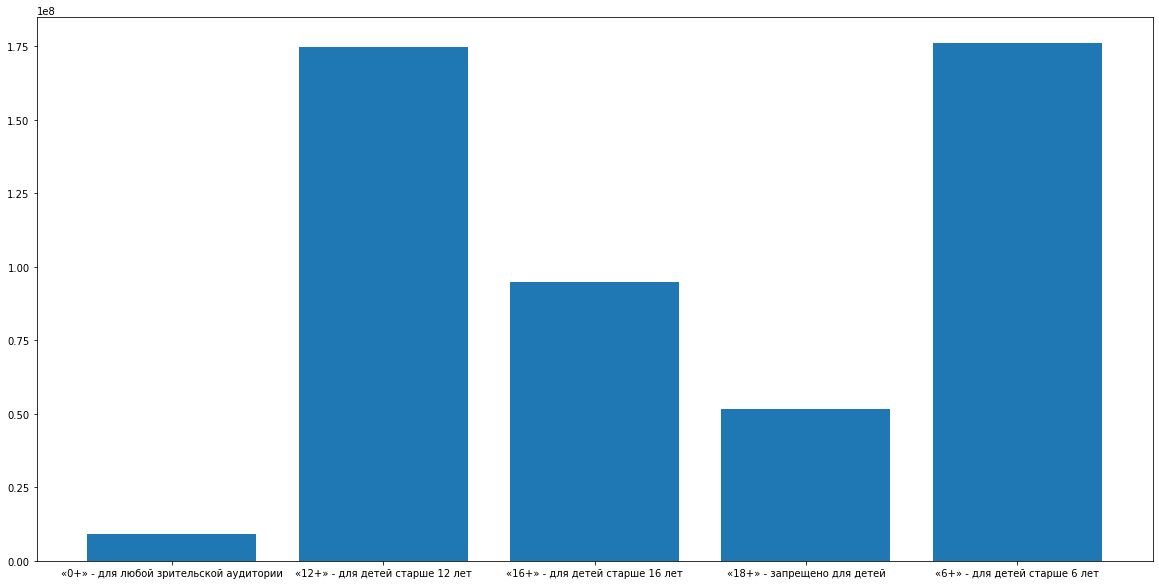

In [88]:
#построение столбчатой диаграммы 
fig = plt.figure(figsize=(20,10))
plt.bar(stat_age_restriction.index, stat_age_restriction['mean'])

На диаграмме видно, что среди лидеров по количеству сборов находятся фильмы с возрастными ограничениями "6+" и "12+". Фильмы с возрастным ограничением "16+" и "18+" имеют гораздо меньшие сборы. Самые минимальные сборы у возрастной категории "0+". Данные результаты весьма объяснимы:

- "0+" (Самые низкие сборы). В данную группу входят фильмы/мультфильмы для детей. Далеко не многие родители поведут совсем маленьких детей в кинотеатры. Большинство взрослых предпочтут более взрослый фильм для просмотра в кинотеатре, поэтому данная группа имеет минимальные сборы среди всех.


- "6+" (Одни из самых больших сборов). В отличие от "0+" в данную группу входят мультфильмы/фильмы для уже более взрослых детей. При посещении кинотеатра многие родители покупают билет для своих детей, а также для себя, что очень сильно поднимает сборы подобных фильмов/мультфильмов.


- "12+" (Также одни из самых больших сборов). Данная группа включает более массовый сегмент зрителей. В нее входят многие популярные фильмы и мультфильмы, например, "Любовь и голуби", многие части Гарри Поттера и т.д. То есть фильмы из данной группы могут быть интересны как подросткам, так взрослым зрителям.


- "16+" (Сборы являются одними из самых минимальных). Данная группа включает в себя более взрослое кино, которое отсекает сегмент подростков из сборов.


- "18+" (Сборы являются одними из самых минимальных). Данная группа еще более ограничена по возрасту, чем группа "16+". Из-за возрастных ограничений фильмы могут посещать еще меньшее количество людей, поэтому у данной группы наблюдается сильное сокращение сборов относительно других категорий.

Далее проанализируем как из года в год менялись средние сборы фильмов. Для этого создадим новую сводную таблицу `stat_age_restriction_by_years` с группировкой по столбцу `premiere_year`. В качетсве колонок этой таблицы будет выступать столбец возростных ограничений `age_restriction`.

In [89]:
#создание сводной таблицы со средними значениями средних сборов
#по каждой возрастной категории за каждый год
stat_age_restriction_by_years = (
    
    df[(df['box_office'] != 0) & (df['premiere_year'] >= 2015)]
    
    .pivot_table(index = 'premiere_year',
                 
                 columns = 'age_restriction',
                 
                 values = 'box_office',
                 
                 aggfunc = 'mean')
)

In [90]:
#изменение названий столбцов в сводной таблице stat_age_restriction_by_years
stat_age_restriction_by_years.set_axis(['0+', '12+', '16+', '18+', '6+'],
                                       axis = 'columns',
                                       inplace = True)

In [91]:
stat_age_restriction_by_years

,0+,12+,16+,18+,6+
premiere_year,,,,,
2015,9.975120e+06,1.891123e+08,6.807258e+07,4.115385e+07,1.641849e+08
2016,3.664118e+06,1.488347e+08,9.206933e+07,4.499291e+07,1.721878e+08
2017,7.653298e+07,1.914982e+08,1.549177e+08,6.565643e+07,2.685809e+08
2018,6.489800e+06,2.129447e+08,1.057923e+08,4.893903e+07,1.486026e+08
2019,5.915356e+06,1.491788e+08,7.164842e+07,5.531036e+07,1.586734e+08


Основываясь на данной таблице, визуально очень тяжело отследить динамику средних сборов из года в год, поэтому построим графики изменения величины с помощью функции `plot`.

Так как нам предстоит построить 5 графиков за каждый год, то для оптимизации процесса реализуем цикл `for`, в котором будем перебирать названия столбцов в таблице `stat_age_restriction_by_years`(возрастные ограничения) и для каждого элемента строить свой график.

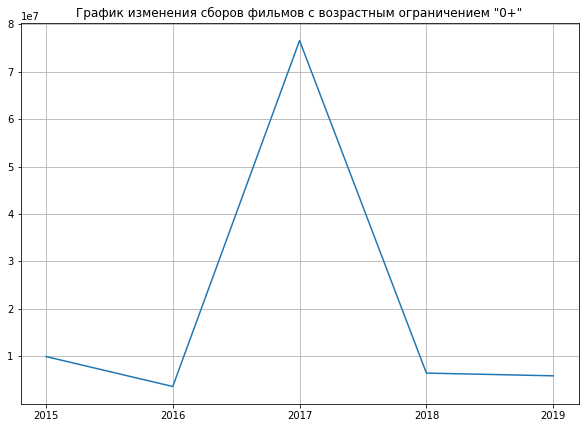

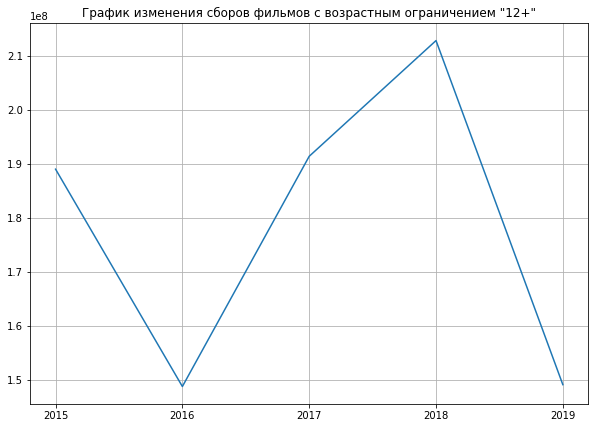

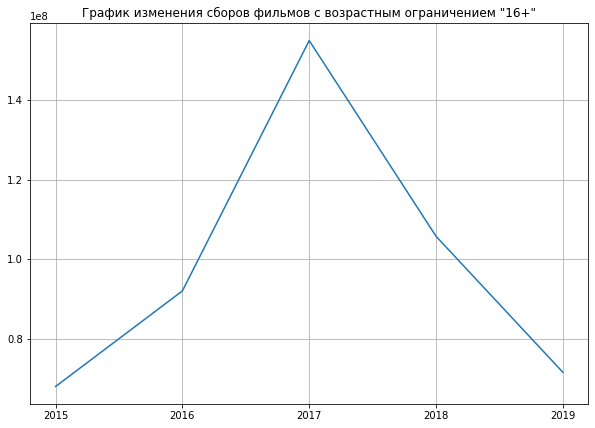

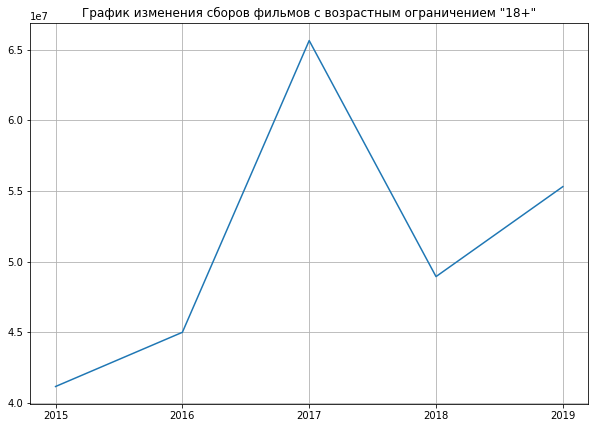

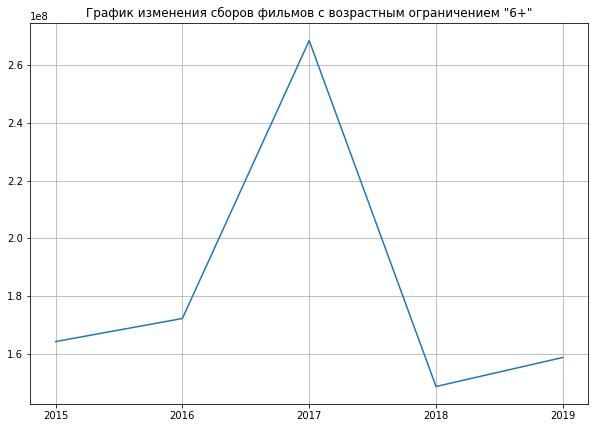

In [92]:
#создание цикла for с перебором каждого столбца
for i in stat_age_restriction_by_years.columns:
    
    #создание фигуры размером 10 на 7
    fig = plt.figure(figsize=(10,7))
    
    #создание графика для динамикой сборов для каждого возрастного ограничения
    plt.plot(stat_age_restriction_by_years.index, stat_age_restriction_by_years[i])
    
    #обозначение названий на оси X
    plt.xticks([2015, 2016, 2017, 2018, 2019])
    
    #обозначение названия графика
    plt.title(f'График изменения сборов фильмов с возрастным ограничением "{i}"')
    
    #отрисовка сетки
    plt.grid()

Теперь проанализируем построенные графики. Все они имеют примерно одинаковую форму, то есть небольшой подъем сборов в период с 2015 по 2016, потом резкое увеличение в 2017 году и такое уже резкое падение в 2018 году. Так можно сказать про все графики, кроме группы «12+». В этой категории 2017 год не является максимальным с точки зрения сборов, 2018 год набрал чуть больше.

По данным графикам можно подтвердить, что 2017 год стал самым удачным с точки зрения сборов практически по всем группам возрастных ограничений.

Интересно посмотреть, какие фильмы сделали 2017 таким удачным.

In [93]:
#вывод списка самых кассовых фильмов в 2017 году
(
    df[~(df['box_office'].isna()) & (df['premiere_year'] == 2017)]
    
    [['title', 'box_office']]
    
    .sort_values('box_office', ascending = False)
    
    .head(20)
)

,title,box_office
5653,Движение вверх,2.779686e+09
3488,Пираты Карибского моря: Мертвецы не рассказыва...,2.118396e+09
5505,Последний богатырь,1.655038e+09
3523,Стражи Галактики. Часть 2,1.468780e+09
3371,Форсаж 8,1.429977e+09
3742,Гадкий я 3,1.390393e+09
3235,Босс-Молокосос,1.376727e+09
5654,Джуманджи: Зов джунглей,1.246588e+09
5548,Тор: Рагнарёк,1.229588e+09
5473,Оно,1.036725e+09


Смотря на список фильмов, становится понятно, почему 2017 является таким успешным годом. Проанализируем некоторые фильмы отдельно, посмотрев какое место они занимают в списке самых кассовых фильмов России (на момент конца 2021) года согласно сайту https://ru.wikipedia.org/wiki/Список_самых_кассовых_фильмов_в_России:

- "Движение вверх" - 3‑е место.

- "Пираты Карибского моря: Мертвецы не рассказывают сказки" - 7‑е место.

- "Последний богатырь" - 21-е место.

- "Стражи Галактики. Часть 2" - 36-е место.

- "Форсаж 8" - 40-е место.

- "Гадкий я 3" - 44-е место.

- "Босс-Молокосос" - 45-е место.

То есть 7 первых фильмов из списка входят в список 50 самых кассовых фильмов России, что конечно является отличным результатом и объясняет, почему в 2017 году получились такие высокие сборы.

### Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Первичный анализ фильмов, получивших государственную поддержку

В первую очередь создадим новый датафрейм `films_with_state_support`, в который войдут фильмы, получившие господдержку. Отфильтруем госфильмы от всех остальных с помощью поля `financing_source`. Также не будем забывать о выявленных ранее проблемах с данными, например, мы выяснили, что нет смысла брать фильмы, выпущенные раньше 2015 года, так как сборы за 2010-2014 года сильно разнятся с 2015-2019 годами. Также мы обнаружили, что у некоторых госфильмов не указана информация о бюджете и вместо нее стоит значение 0.

In [94]:
#создание нового датафрейма с фильмами, получившими господдержку
films_with_state_support = (
    
    df[~(df['financing_source'].isna()) &
       
       (df['budget'] != 0) &
       
       (df['premiere_year'] >= 2015)]
)

Выведем общую статистику по новому датафрейму, оставив только интересующие нас столбцы.

In [95]:
#вывод описательной статистики нового датафрейма
(
    films_with_state_support
    
    .describe()
    
    [['refundable_support',
                 'nonrefundable_support',
                 'budget',
                 'ratings',
                 'box_office',
                 'state_support_share']]
)

,refundable_support,nonrefundable_support,budget,ratings,box_office,state_support_share
count,2.980000e+02,2.980000e+02,2.980000e+02,284.000000,2.840000e+02,298.000000
mean,1.202685e+07,4.879654e+07,1.365951e+08,6.035563,1.349038e+08,0.517480
std,2.569827e+07,6.122468e+07,1.956067e+08,1.165964,3.476795e+08,0.170059
min,0.000000e+00,0.000000e+00,1.446246e+07,1.000000,1.550000e+03,0.044043
25%,0.000000e+00,2.500000e+07,4.615550e+07,5.400000,1.207916e+06,0.375000
50%,0.000000e+00,3.000000e+07,7.244859e+07,6.200000,1.439257e+07,0.592714
75%,1.375000e+07,4.000000e+07,1.501128e+08,6.725000,1.050603e+08,0.656333
max,1.800000e+08,4.000000e+08,2.305074e+09,9.400000,3.073569e+09,0.784745


Можем снова наблюдать, что в столбце `box_office` снова присутствуют подозрительно низкие значения. Необходимо выполнить такую же проверку группировки по году премьеры, как и в предыдущем исследовании.

По статистике поля `state_support_share` можно сделать вывод, что в среднем объем средств, выделенных государством при создании фильма, составляет 50%.

Значение среднего объёма невозвратных средств государственной поддержки сильно превышает объем возвратных средств (**48 796 540** и **12 026 850**). Так как медиана столбца `refundable_support` равна 0, можно сделать вывод, что относительно небольшое количество фильмов снимаются при условии возврата государству некоторого объема сборов.

Также прослеживается, что средний объем бюджета фильмов больше, чем средние сборы. Можно предположить, что большинство фильмов не окупаются в прокате. 

Выполним группировку по столбцу `premiere_year` и посмотрим статистику по сборам, как и в предыдущем исследовании.

In [96]:
#вывод средних значений сборов фильмов, получивших господдержку, в разрезе каждого года
(
    films_with_state_support
    
    .pivot_table(index = 'premiere_year',
                 
                 values = 'box_office',
                 
                 aggfunc = ['min', 'max', 'mean', 'count'])
)

,min,max,mean,count
,box_office,box_office,box_office,box_office
premiere_year,,,,
2015,1550.0,7.049282e+08,6.095883e+07,79
2016,9000.0,1.402255e+09,8.697762e+07,57
2017,168512.0,2.779686e+09,2.907977e+08,37
2018,55685.0,2.271754e+09,1.830319e+08,52
2019,75850.0,3.073569e+09,1.400342e+08,59


В датафрейме снова содержатся подозрительно низкие данные, но значения средних величин сборов в 2015 и 2016 годах говорят нам о том, что только лишь небольшая часть данных не дотягивает до пригодного уровня.

Попробуем установить фильтр `box_office > 20000` и посмотреть как это отобразиться на общей статистике минимальных значений.

In [97]:
#вывод средних сборов с фильтром 20000
(
    films_with_state_support[films_with_state_support['box_office'] > 20000]
    
    .pivot_table(index = 'premiere_year',
                 
                 values = 'box_office',
                 
                 aggfunc = ['min', 'count'])
)

,min,count
,box_office,box_office
premiere_year,,
2015,36550.0,75
2016,35897.0,56
2017,168512.0,37
2018,55685.0,52
2019,75850.0,59


Мы избавились от 5 значений, в которых сборы оказались подозрительно минимальными, и видим, что статистика более менее выровнялась. Уберем их из датафрейма `films_with_state_support`, чтобы они не влияли на результаты анализа средних значений сборов.

In [98]:
#удаление фильмов, у которых подозрительно минимальные значения сборов
films_with_state_support = films_with_state_support[films_with_state_support['box_office'] > 20000]

#### Исследование окупаемости фильмов, получивших господдержку

При первичном анализе мы сделали предположение, что существует некоторое количество фильмов, которые не окупились в прокате. Выполним более детальный анализ данного предположения.

In [99]:
#вывод количества фильмов, не окупившихся в прокате
(
    films_with_state_support[films_with_state_support['budget'] > films_with_state_support['box_office']]['title']
    .count()
)

216

In [100]:
#вывод процента не окупившихся фильмов
(216 / 279) * 100

77.41935483870968

Видим, что 77% фильмов, получивших поддержку от государства, не окупились в прокате. Конечно, данный результат является неудовлетворительным.

Выявим какое количество фильмов по итогам сборов не смогли отбить весь объём возвратных средств государственной поддержки.

In [101]:
#вывод количества фильмов, которые не окупили весь объём возвратных средств государственной поддержки
(
    films_with_state_support[films_with_state_support['refundable_support'] >= films_with_state_support['box_office']]
    
    ['title'].count()
)

25

Таких фильмов оказалось целых 25 и для датафрейма, в котором всего 279 записей, это достаточно плохой результат.

Возможны 2 причины таких плохих результатов:

- Фильмы действительно плохие. Тогда средний рейтинг таких фильмов будет одним из самых низких.

- Фильмы не получили необходимой рекламы и люди просто не знали об их премьерах. В таком случае средний рейтинг таких фильмов будет примерно равен среднему рейтингу окупившихся фильмов.

Для исследования данных гипотез необходимо вычислить коэффициент корреляции Пирсона и проанализировать зависимость общих сборов от рейтингов фильмов.

In [102]:
#вывод таблицы корреляции столбцов датафрейма films_with_state_support
films_with_state_support.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,premiere_year,state_support_share
puNumber,1.000000,0.217360,-0.003196,0.119207,-0.068737,0.059222,-0.000204,-0.230840
refundable_support,0.217360,1.000000,0.328070,0.650279,0.027608,0.321104,0.047554,-0.025617
nonrefundable_support,-0.003196,0.328070,1.000000,0.594198,0.153466,0.443754,0.099946,0.130225
budget,0.119207,0.650279,0.594198,1.000000,0.100491,0.371294,0.152662,-0.316420
ratings,-0.068737,0.027608,0.153466,0.100491,1.000000,0.152321,0.056377,-0.033325
box_office,0.059222,0.321104,0.443754,0.371294,0.152321,1.000000,0.111016,-0.112987
premiere_year,-0.000204,0.047554,0.099946,0.152662,0.056377,0.111016,1.000000,-0.094332
state_support_share,-0.230840,-0.025617,0.130225,-0.316420,-0.033325,-0.112987,-0.094332,1.000000


Для наглядного анализа нарисуем хитмап на основе таблицы корреляции.

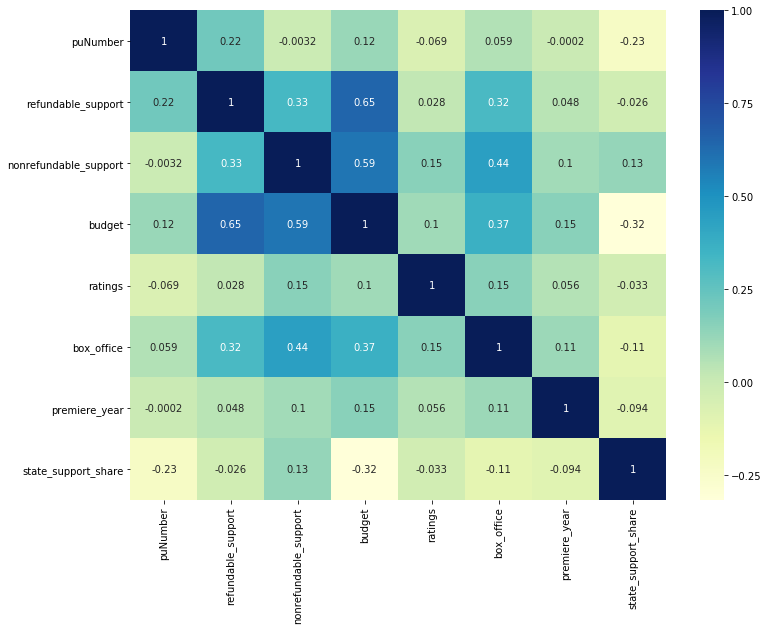

In [103]:
#отрисовка хитмапа на основе таблицы корреляции
plt.figure(figsize=(12, 9))
sns.heatmap(films_with_state_support.corr(), annot = True, cmap="YlGnBu")
plt.show()

На основе хитмапа можно сделать следующие выводы:

- Рейтинги фильмов не коррелирует ни с одной величиной. То есть наша гипотеза о том, что можно объяснить общую низкую окупаемость фильмов на основе общих низких рейтингов не подтвердилась. Возможно, эту задачу стоит декомпозировать на отдельные группы, например, по жанрам, режиссеру и т.д. и тогда проанализировать корреляцию общих сборов от рейтингов. Изучим рейтинги фильмов в следующем пункте исследования.


- Общие сборы зависят от бюджета фильма (конечно, это объяснимо, так как чем выше вложения в фильм, в его рекламу и т.д., тем больше сборы), а также от объемов возвращаемых и невозвращаемых средств. Причем положительная корреляция общих сборов от невозвращаемой поддержки больше, чем корреляция сборов от возвращаемой. Это возможно объяснить тем, что количество случаев, в которых объем невозвращаемой поддержки превышает объем возвращаемой, превосходит количество иных ситуаций. Возможно, большинство фильмов не окупились в прокате по причине недостаточных вложений со стороны государства. Исследуем эту гипотезу.

Попробуем доказать, что объем государственной поддержки очень важен для последующей окупаемости. Для этого:

1. Выявим 50 фильмов с самой минимальной государственной поддержкой.

2. Посмотрим сколько из этих 50 не окупились.

Если большинство таких фильмов не окупились, то можно будет утверждать, что государственная поддержка во многих случаях очень сильно влияет на окупаемость фильма.

Создадим список с названиями 50-и самых минимальных относительно государственной поддержки фильмов. Для этого отсортируем весь датафрейм по столбцам `refundable_support` и `nonrefundable_support` и возьмем первые 50 названий.

In [104]:
#создание списка фильмов, имеющих минимальную государственную поддержку
films_with_min_support = (films_with_state_support
                             .sort_values(['refundable_support', 'nonrefundable_support'], ascending = True)['title']
                             .head(50)
                             .to_list()
                            )

Далее из датафрейма `films_with_state_support` с помощью метода `isin` возьмем только те фильмы, которые присутствуют в списке `films_with_min_support` и применим к ним фильтр окупаемости `(films_with_state_support['budget'] > films_with_state_support['box_office'])`, а также метод `count`. Таким образом мы посчитаем количество не окупившихся фильмов с минимальной государственной поддержкой.

In [105]:
#вывод количества не окупившихся фильмов с минимальной государственной поддержкой
(films_with_state_support
 [(films_with_state_support['budget'] > films_with_state_support['box_office']) &
  (films_with_state_support['title'].isin(films_with_min_support))]
 ['title']
 .count()
)

49

Результат говорит сам за себя: 49 фильмов из 50, имеющих минимальную государственную поддержку, не окупились, поэтому можно утверждать, что в большинстве случаев государственная поддержка имеет большое значение и влияет на итоговую окупаемость больше, чем все остальные метрики.

**Итог**

В данном исследовании мы выявили, что очень большая часть фильмов не окупились в прокате. Причины не окупаемости можно привести следующие:

- Объема средств государственной поддержки в большинстве случаев действительно не хватает для создания окупаемого кино.

- При создании кино государственные деньги расходуются не слишком рационально.

- На рекламу выделяется недостаточно средств и поэтому многие люди просто не знают о премьере того или иного фильма.

Скорее всего в каждом конкретном случае эти причины пересекаются или добавляются новые, например, эпидемиологическая обстановка.

#### Выявление нижней границы объема государственной поддержки, необходимой для достижения окупаемости

В предыдущем пункте мы предположили, что фильмы с небольшим объемом государственной поддержки в большинстве случаев не окупаются из-за того, что выделенных средств не хватает для создания окупаемого кино. Здесь назревает вопрос, какой минимальный объем средств государственной поддержки необходим для создания фильмов, которые окупятся в прокате?

Для ответа на этот вопрос выведем статистику по столбцам `refundable_support` и `nonrefundable_support` для фильмов, которые окупились. Далее проанализируем их среднее арифметическое и медиану.

In [106]:
#вывод статистики для фильмов, которые окупились в прокате
(films_with_state_support[
    (films_with_state_support['budget'] < films_with_state_support['box_office'])]
 .sort_values('nonrefundable_support', ascending = True)
 [['refundable_support', 'nonrefundable_support']].describe()
)

,refundable_support,nonrefundable_support
count,6.300000e+01,6.300000e+01
mean,2.147619e+07,6.572480e+07
std,2.936250e+07,8.169480e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.642750e+07
50%,5.000000e+06,3.500000e+07
75%,4.000000e+07,5.828953e+07
max,1.150000e+08,4.000000e+08


Существует огромная разница между медианой и средним арифметическим. И тут возникает  вопрос, что выбрать в качестве минимального объема средств государственной поддержки, который необходим для создания окупаемого кино.

Здесь нам поможет величина среднего отклонения. Большие объемы среднего отклонения значат, что в среднем объем государственной поддержки сильно вирируется. Это также можно проследить по разнице между минимальным и максимальным значениями. Большие объемы государственной поддержки для некоторых фильмов очень сильно влияют на среднее арифметическое, а вот медиана от них практически не страдает, поэтому возьмем ее в качестве минимального объема средств средств государственной поддержки, который способен обеспечить окупаемость.

В большинстве случаев объём возвратных средств государственной поддержки отсутствует или присутствует, но в паре с некоторым объёмом невозвратных средств государственной поддержки. Поэтому в качестве минимального возьмем сумму медиан столбцов `refundable_support` и `nonrefundable_support`. Таким образом, минмиальный объем средств государсвенной поддержки, необходимый для создания окупаемого кино - **40 000 000 рублей**.

Для проверки нашего предположения о нижней границе, посмотрим, сколько из окупившихся фильмов получили государственную поддержку более 40 000 000 рублей. Если таких фильмов большинство, то можно утверждать, что 40 000 000 это та самая нижняя граница, которая способна обеспечить фильму последующую окупаемость.

In [107]:
#проверка количества окупившихся фильмов, которые имели поддрежку более 40 000 000 рублей
(
    films_with_state_support
    [(films_with_state_support['refundable_support'] + films_with_state_support['nonrefundable_support'] >= 40000000) &
        (films_with_state_support['budget'] < films_with_state_support['box_office'])]
    ['title'].count()
)

44

In [108]:
#общее количество окупившихся фильмов
(
    films_with_state_support[(films_with_state_support['budget'] < films_with_state_support['box_office'])]
    ['title']
    .count()
)

63

In [109]:
#вывод процента окупившихся фильмов
(44 / 63) * 100

69.84126984126983

Почти 70% окупившихся фильмов получили государственную поддержку более 40 000 000. Такой процент является очень весомым, поэтому можно утверждать, что наша гипотеза о нижней границе оказалась верной.

Если мы проверили окупившиеся фильмы, то можно аналогично проверить и не окупившиеся. Здесь наоборот меньший процент не окувшихся фильмов, у которых поддержка составляет более 40 000 000,  означает, что наше предположение является корректным.

In [110]:
#проверка количества не окупившихся фильмов, которые имели поддрежку более 40 000 000 рублей
(
    films_with_state_support
    
    [(films_with_state_support['refundable_support'] + films_with_state_support['nonrefundable_support'] >= 40000000) &
     
        (films_with_state_support['budget'] > films_with_state_support['box_office'])]
    
    ['title'].count()
)

83

In [111]:
#общее количество не окупившихся фильмов
(
    films_with_state_support[(films_with_state_support['budget'] >
                              films_with_state_support['box_office'])]
    ['title']
    .count()
)

216

In [112]:
#вывод процента не окупившихся фильмов
(83 / 216) * 100

38.425925925925924

Только 38% фильмов имели бюджет более 40 000 000 рублей. Это также может означать, что 40 000 000 можно считать минимальным объемом для создания окупаемого кино.

Конечно, нельзя утверждать, что если государство инвестирует 40 000 000 рублей в создание фильма, то 100% получится хороший, окупаемый продукт. Очень многое зависит от самого качественного контента. В исходном датафрейме метрикой качества контента является рейтинг фильмов. Поэтому будем исследовать не только материальную сторону вопроса, но и сторону восприятия фильмов зрителями.

#### Анализ самых прибыльных фильмов, получивших государственную поддержку

В данном исследовании интересно посмотреть о зависимостях, которые, возможно, существуют между самыми прибыльными фильмами.

Для этого выполним следующие действия:

- Отфильтруем датафрейм по условию окупаемости - `films_with_state_support['box_office'] > films_with_state_support['budget']`.

- Отсортируем отфильтрованный датафрейм по убыванию столбца `box_office`.

- Возьмем первые 10 фильмов.

- Оставляем только необходимые для исследования столбцы, то есть `title`, `show_start_date`, `ratings` и `box_office`.

In [113]:
#вывод топ 10 самых прибыльных фильмов
(
    films_with_state_support[(films_with_state_support['box_office'] >
                              
                              films_with_state_support['budget'])]
    
    .sort_values('box_office', ascending = False)
    
    [['title', 'show_start_date', 'ratings', 'box_office']]
    
    .head(10)
)

,title,show_start_date,ratings,box_office
7456,Холоп,2019-12-19,6.8,3.073569e+09
5653,Движение вверх,2017-12-21,7.5,2.779686e+09
6549,Т-34,2018-12-21,6.5,2.271754e+09
5505,Последний богатырь,2017-10-19,6.8,1.655038e+09
5708,Лёд,2018-02-01,NaN,1.445732e+09
2920,Экипаж .,2016-03-21,7.6,1.402255e+09
5641,Ёлки Новые,2017-12-21,5.8,8.554511e+08
5826,Тренер,2018-04-19,6.8,8.205280e+08
5659,Три богатыря и принцесса Египта,2017-12-21,5.5,7.592268e+08
5502,Салют-7,2017-10-01,7.4,7.526798e+08


Видим, что первые три фильма ("Холоп", "Движение вверх" и "Т-34") вырвались далеко вперед от остального кино. Однако, в данном случае можно обнаружить одну любопытную деталь: 5 из 10 самых прибыльных фильмов, в том числе 3 лидирующих фильма, были выпущены в конце декабря, то есть перед новогодними праздниками.

Люди очень часто выбирают кино, как способ проведения досуга в новогодние праздники. Как показывают данные, этот факт очень сильно поднимает сборы фильмов в прокате.

#### Исследование рейтингов фильмов с группировкой по различным столбцам

Проанализируем статистику рейтингов по основным категориальным столбцам:

- type;

- main_director;

- main_genres;

- age_restriction;

- premiere_year.

В процессе вывода статистики по рейтингам различных столбцов нам предстоит выполнять одни и те же действия, то есть создавать сводную таблицу  по каждому из интересующих столбцов, применив к ним методы `count` и `mean`,  а также изменять названия столбцов на "count" и "mean" и выводить итоговую сводную таблицу в отсортированном по столбцу `mean` виде. Поэтому для оптимизации однотипных действий создадим функцию `ratings_statistics`, которая будет принимать на вход интересующих нас столбец и создавать по нему сводную таблицу, используя столбец `ratings` в качестве значений арифметических операции `count` и `mean`.

In [114]:
#создание функции вывода статистики рейтингов
def ratings_statistics(column):
    
    #создание сводной таблицы со статистикой рейтингов 
    column_pivot_table = films_with_state_support.pivot_table(index = column, values = 'ratings', aggfunc = ['count', 'mean', 'std'])
    
    #переименование столбцов в сводной таблицы
    column_pivot_table.set_axis(['count', 'mean', 'std'], axis = 'columns', inplace = True)
    
    #вывод сводной таблицы с сортировкой по столбцу mean
    return column_pivot_table.sort_values('mean', ascending = False)

##### Анализ рейтингов фильмов в разрезе каждого года

In [115]:
#вывод статистики по рейтингам в разрезе каждого года
ratings_statistics(films_with_state_support['premiere_year'])

,count,mean,std
premiere_year,,,
2019,57,6.226316,0.983711
2015,73,6.127397,1.155934
2017,35,6.045714,1.281163
2018,50,6.042000,1.061206
2016,52,5.684615,1.388805


На сколько мы помним из предыдущих исследований рейтинги никак не связаны с окупаемостью. В данном исследовании мы можем еще раз в этом убедиться, так как 2017 и 2018 года были самым окупаемыми, но с точки зрения рейтингов они расположились в середине списка. А 2019 и 2015 года были далеко не самыми окупаемыми, но зато хорошими с точки зрения рейтингов. Также можно утверждать, что 2016 год стал совсем провальным, так как имеет рейтинг сильно ниже всех остальных лет.

##### Анализ рейтингов фильмов в разрезе возрастного ограничения

In [116]:
#вывод статистики по рейтингам в разрезе каждого возрастного ограничения
ratings_statistics(films_with_state_support['age_restriction'])

,count,mean,std
age_restriction,,,
«18+» - запрещено для детей,22,6.300000,0.913914
«0+» - для любой зрительской аудитории,2,6.200000,0.707107
«12+» - для детей старше 12 лет,82,6.064634,1.173617
«6+» - для детей старше 6 лет,57,6.050877,1.448537
«16+» - для детей старше 16 лет,104,5.945192,1.075850


По количеству рейтингов в различных возрастных ограничениях можно сделать вывод, что средства на создание фильмов/мультфильмов категории «0+» практически не выделяются. По всем остальным категориям достаточно данных, чтобы проанализировать рейтинги.

Больше всего фильмов представлено в категории «16+», но при этом средний рейтинг этих фильмов является наименьшим среди всех возрастных ограничений. На втором месте по количеству фильмов расположена категория «12+», у которой значение среднего рейтинга является весьма неплохим (**6.06**). Далее в списке идет категория «6+», у которой рейтинг относительно схож с категорией «12+». Возможно, спонсирующим компаниям будет полезно перенаправить финансирование в сторону фильмов категории «12+» и «6+». Категория «18+» имеет самый высокий средний рейтинг среди всех, но при этом таких фильмов относительно мало, так как скорее всего ввиду возрастного ограничения они не окупятся.

##### Анализ рейтингов фильмов в разрезе каждого типа

In [117]:
#вывод статистики по рейтингам в разрезе каждого типа
ratings_statistics(films_with_state_support['type'])

,count,mean,std
type,,,
Художественный,244,6.060246,1.170284
Анимационный,23,5.773913,1.249079


В данном исследовании было любопытно пронаблюдать, смогут ли анимационные фильмы при очевидно меньшем количестве набрать такие же рейтинги, как и художественные. Как мы можем увидеть, на данный момент анимационные фильмы не могут составить конкуренцию художественным.

##### Анализ рейтингов фильмов в разрезе каждого режиссера

Так как в датафрейме `films_with_state_support` представлено достаточно много режиссеров и проанализировать их всех весьма затруднительно, поэтому возьмем только тех режиссеров, у которых в послужном списке находится минимум 2 фильма. Для фильтрации сначала создадим список с фамилиями режиссеров, у которых более 2 фильмов.

In [118]:
#создание списка режиссеров с более чем 2 снятыми фильмами
often_main_directors = (
    
    films_with_state_support
    
    .groupby('main_director') #группировка по main_director
    
    .agg('count') #применение функции count к сгруппированным данным
    
    .query('title >= 2') #выбор режиссеров, у которых более 2 фильмов
    
    .index #выбираем только индексы, то есть только фамилии
    
    .to_list() #сохранение фамилий в список
)

Далее выведем статистику рейтингов только по тем режиссерам, которые есть в списке `often_main_directors`.

In [119]:
#вывод статистики по каждому режиссеру из списка often_main_directors
ratings_statistics(
    films_with_state_support[films_with_state_support
                                            .isin(often_main_directors)]['main_director']
)

,count,mean,std
main_director,,,
В.Тодоровский,2,7.450,1.484924
Р.Давлетьяров,4,7.150,1.247664
К.Шипенко,2,7.100,0.424264
А.Карпиловский,2,6.850,0.636396
Ф.Дмитриев,2,6.800,0.848528
Д.Месхиев,2,6.800,0.424264
П.Руминов,2,6.800,1.414214
А.Темников,2,6.750,0.777817
К.Худяков,2,6.700,1.838478


В данном списке 38 режиссеров. В общем рейтинги их фильмов можно категорировать на следующие группы:

- Высокие рейтинги (с 7.450 по 6.650);

- Средние рейтинги (с 6.600 по 6.150);

- Ниже среднего рейтинги (с 6.050 по 5.750);

- Низкие рейтинги (с 5.650 по 4.400).

Из режиссеров необходимо выделить Рената Давлетьярова, у которого один из самых высоких рейтингов (**7.150**) и при этом снято целых 4 фильма.

Из списка режиссеров, у которых по 2 снятых фильма, можно выделить:

- Клим Шипенко.

- Александр Карпиловский.

- Федор Дмитриев.

- Дмитрий Месхиев.

- Артем Темников.

- Анна Меликян.

- Наталья Меркулова.

Рейтинги этих режиссеров ранжируются от 7.450 до 6.450, что является отличным результатом. За данных режиссеров говорит также и тот факт, что рейтинги двух снятых фильмов примерно сопоставимы. Это можно доказать с помощью стандартного отклонения, которое у данных режиссеров не превышает 0.8.

Можно выделить также режиссеров, у которых фильмы имеют средние рейтинги, но при этом наименьшее стандартное отклонение:

- Александр Котт.

- Павел Лунгин.

- Алексей Цицилин.

- Дарина Шмидт.

- Михаил Расходников.

- Николай Хомерики.

Данных режиссеров можно считать перспективными, так как им уже выделялось государственное финансирование и они довольно хорошо себя показали с точки зрения средних рейтингов.

##### Анализ рейтингов фильмов в разрезе каждого жанра

Перед выполнением данного исследования необходимо вспомнить, что в столбце `main_genres` мы заменяли пропуски на значение "Unknown". Поэтому при выводе статистики рейтингов применим фильтр `films_with_state_support['main_genres'] != 'Unknown'`.

In [120]:
#вывод статистики по каждому жанру
ratings_statistics(
    films_with_state_support[films_with_state_support['main_genres'] != 'Unknown']['main_genres']
)

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,count,mean,std
криминал,3,7.500000,1.178983
детский,3,7.100000,0.346410
спорт,3,6.933333,0.602771
биография,3,6.900000,0.600000
детектив,5,6.760000,0.808084
мюзикл,4,6.550000,0.704746
драма,77,6.496104,0.911107
военный,9,6.466667,0.612372
боевик,5,6.340000,0.658027
фантастика,8,6.212500,2.117571


В итоговой сводной таблице сразу бросается в глаза статистика по жанру "драма". Фильмов с таким жанром больше всех (**77**), при этом они имеют относительно отличный средний рейтинг (**6.496**). Также из жанров с достаточным количеством фильмов и низким стандартным отклонением, можно выделить:

- детектив (6.760);

- военный (6.466);

- боевик (6.340).

Видим, как после жанра "фэнтези" рейтинги резко сокращаются и по сути неудачные с точки зрения среднего рейтинга жанры расположены в списке ниже жанра "мультфильм".

Совсем все плохо по рейтингам у жанров:

- триллер (5.70);

- мелодрама (5.67);

- комедия (5.52);

- ужасы (5.20).

У данных жанров рейтинги ниже среднего при достаточно высоком стандартном отклонении и при относительно большом количестве. Возможно, стоит подумать над инвестированием государственной поддержки c целью разработки интересного контента в этих жанрах для их развития.

#### Анализ источников финансирования

Выведем еще раз статистику по частоте встречаемости различных значений в столбце `financing_source`.

In [121]:
#вывод статистики по различным источникам финансирования
films_with_state_support['financing_source'].value_counts()

Министерство культуры               139
Фонд кино                           122
Министерство культуры, Фонд кино     18
Name: financing_source, dtype: int64

У нас имеется только 2 источника государственного финансирования: Министерство культуры и Фонд кино. Иногда они объединяются для совместного финансирования кино.

В данном исследовании интересно проанализировать статистику по сборам и рейтингам в разрезе каждого источника финасирования. Снала проанализируем рейтинги.

In [122]:
#вывод сводной таблицы средних рейтингов в разрезе каждого источника финансирования
(
    films_with_state_support
    .pivot_table(index = 'financing_source',
                 values = 'ratings',
                 aggfunc = ['mean', 'std'])
)

,mean,std
,ratings,ratings
financing_source,,
Министерство культуры,6.143511,1.007823
"Министерство культуры, Фонд кино",6.447059,0.875441
Фонд кино,5.857983,1.354183


Видим, что когда 2 источника финансирования объединяются вместе получается самый высокий средний рейтинг с самым низким стандартным отклонением. На втором месте расположилось Министерство культуры, у которых рейтинг близкий к ранее выявленному среднему значению по всему датафрейму (6.14). И совсем низкий средний рейтинг у Фонда кино (5.85 при стандартном отклонении 1.35).

Теперь проанализируем средние сборы.

In [123]:
#вывод сводной таблицы средних сборов в разрезе каждого источника финансирования
(
    films_with_state_support
    .pivot_table(index = 'financing_source',
                 values = 'box_office',
                 aggfunc = ['mean', 'median', 'std'])
)

,mean,median,std
,box_office,box_office,box_office
financing_source,,,
Министерство культуры,3.809904e+07,2.220980e+06,9.719323e+07
"Министерство культуры, Фонд кино",3.901373e+07,9.201590e+06,1.051465e+08
Фонд кино,2.648739e+08,8.703926e+07,4.903855e+08


В данном случае ситуация полностью противоположная ситуации выше. Фонд кино при наименьших средних рейтингах имеет сборы на порядок выше, чем Министерство культуры (264 873 900 и 39 013 730).

Из анализа средних сборов по каждому из источников финансирования вытекает анализ средних объемов государственной поддержки, которую предоставляют оба источника.

In [124]:
#вывод сводной таблицы средних объемов государственной поддержки в разрезе каждого источника финансирования
(
    films_with_state_support
    .pivot_table(index = 'financing_source',
                 values = ['refundable_support', 'nonrefundable_support'],
                 aggfunc = ['mean'])
)

mean                   
                                 nonrefundable_support refundable_support
financing_source                                                         
Министерство культуры                     3.033555e+07       0.000000e+00
Министерство культуры, Фонд кино          3.747384e+07       1.808333e+07
Фонд кино                                 7.183015e+07       2.535656e+07

Видим, что Фонд кино выделяет больше средств государственной поддержки, чем Министерство культуры. Причем это относится как к озвращаемой, так и к невозвращаемой поддержке. Министерство культуры вообще не выделяет возвращаемый объем поддержки.

Данное исследование в очередной раз доказывает, что стоит разделять кассовое и рейтинговое кино. Фонд кино делает упор на сборы и окупаемость фильмов, а Министерство культуры в свою очередь на рейтинги и создание интересного контента. И это кажется логичным, так как Фонд кино выделяет больше средств государственной поддержки, чем Министерство Культуры, а значит больше стремится окупить вложенные средства.

Когда эти источники объединяются, то создается кино с высокими рейтингами, но сборы остаются примерно на таком же уровне, что и сборы Министерства культуры.

### Напишите общий вывод

Настало время подвести некоторые итоги нашего исследования. В ходе работы мы сделали следующие действия:


1. Объединили 2 датафрейма с помощью метода `left join`, то есть оставили все строки левого датафрейма и присоединили совпадающие значения правого датафрейма. В качестве столбца, по которому происходило соединение, мы использовали `puNumber`.


2. Изменили тип данных в столбцах: `show_start_date`,  `refundable_support`, `nonrefundable_support`, `ratings`  и `budget`.


3. Заполнили пропуски в столбцах: `film_studio`, `production_country`, `director`, `producer`, `financing_source`, `ratings`, `genres` и `box_office`.


4. Проанализировали дубликаты. Выяснили, что полных дубликатов в датафрейме нет, но существуют неявные дубли. К неявным дубликатам мы отнесли фильмы с одинаковым названием и режиссером. Неявные дубли отличаются по полям `puNumber` и `show_start_date`, то есть премьеры таких фильмов состоялись в разные промежутки времени с разными прокатными номерами. Для предотвращения искажения результатов, было решено не удалять неявные дубли из датафрейма.


5. Изучили категориальные значения. Выявили, что многие категориальные столбцы имеют большое количество уникальных значений. Это происходит из-за частых коллабораций режиссеров, стран, киностудий и т.д. Было решено, что для выделения полноценных категорий из таких столбцов, необходимо брать первое значение, которое и будет являться основным. Так мы поступили, например, с выявлением главного режиссера и основного жанра фильмов.


6. Изучили количественные значения. Выявили, что в них существует некоторое несоответствие описанию данных. Столбец бюджет должен включать в себя объем государственной поддержки, то есть должно выполняться условие `df['budget'] >= (df['refundable_support'] + df[‘nonrefundable_support’])`. Тем не менее существует 17 значений, в которых это условие не выполняется. Все эти фильмы были сняты при поддержке государства. У них указано значение 0 вместо реального объема бюджета. Скорее всего у таких фильмов изначально не был известен бюджет и для заполнения пропуска использовалось значение 0. Было решено не убирать данные строки из датафрейма, так как эти данные могли пригодиться для анализа других метрик, например, рейтингов и объема государственной поддержки.


7. Добавили новые столбцы: `premiere_year` (год премьеры), `main_director` (ФИО главного режиссёра), `main_genres` (название основного жанра) и `state_support_share` (доля государственной поддержки в общем бюджете).


8. Выполнили анализ количества премьер в разрезе каждого года. Получили, что в 2010, 2018 и 2019 года были наибольшие показатели премьер. Но количество премьер за годы не играет никакой роли для анализа, если по этим премьерам не известны основные метрики (сборы и рейтинги). Поэтому далее мы перешли к выявлению доли фильмов, у которых известны объемы сборов.


9. Оказалось, что фильмов, у которых известны сборы, оказалось всего 42% от общего числа фильмов. Но являются ли эти 42% качественными данными, на которые можно опираться при анализе?


10. Для ответа на этот вопрос мы проанализировали минимальное и максимальное значения сборов по каждому году. Выявили, что оба значения до 2015 года являются неправдоподобно низкими.


11. Проанализировали средние сборы по каждому году. Здесь стало окончательно понятно, что с данными за 2010-2014 года что-то не так. Возможно, сборы за эти года записаны в долларах, а с 2015 года стали записываться в рублях. В данном исследовании мы сделали вывод, что для корректных результатов анализа необходимо использовать данные только за 2015-2019 года.


12. Проанализировали влияние различных возрастных ограничений на сборы в период с 2015 по 2019 года. Выявили, что группы «6+» и «12+» имеют самые высокие сборы. Здесь без особых сюрпризов, так как эти 2 группы включают в себя большинство сегментов пользователей (дети, подростки, взрослые). Самые низкие сборы у категорий «0+» (скорее всего потому что здесь содержится большинство мультфильмов) и «18+» (здесь наоборот идет сильное ограничение по возрасту и сегменты детей, подростков не могут смотреть эти фильмы в кино).


13. Проанализировали сборы по каждому возрастному ограничению в разрезе каждого года. Выявили, что 2017 год является самым прибыльным с точки зрения сборов практически по всем возрастным категориям.


14. Далее мы перешли к самому интересному этапу проекта - исследование фильмов, получивших господдержку. Данное исследование мы разделили на 2 части: анализ общих сборов и окупаемости и анализ рейтингов фильмов.


15. Провели первичный анализ  фильмов, получивших государственную поддержку и вот что удалось выявить:

    - В среднем государственная поддержка при создании кино составляет чуть больше 50% от общего бюджета.
    
    - Средний объём невозвратных средств государственной поддержки сильно превышает объем возвратных средств (48 796 540 и 12 026 850).
    
    - Относительно немного фильмов сняты с условием возвращения некоторого объема средств государственной поддержки. 
    
    - В датафрейме содержится достаточно большой процент не окупившихся фильмов.
   
   
16. Исследовали не окупившиеся фильмы, получившие государственную поддержку. Оказалось, что целых 77,5% фильмов от общего числа не окупились.
    
    
17. Посмотрели корреляцию итоговых сборов от других величин и получили следующие вывод:

    - Общие сборы фильмов никак не связаны с их рейтингами.
       
    - Существует положительная корреляция между общими сборами и объемом полученной государственной поддержки.
    
    
18. Далее возник вопрос, сколько средств необходимо выделить государству для создания окупаемого кино. В процессе данного исследования было выявлено, что таким объемом является сумма в 40 000 000 рублей. Конечно, эта сумма не является гарантом создания хорошего контента, но как показали данные, почти 70% от общего числа окупившихся фильмов имели в своем распоряжении более 40 000 000 рублей государственной поддержки.


19. Проанализировали самые прибыльные фильмы, получившие государственную поддержку. Выявили, что премьеры 5 и 10 таких фильмов, в том числе 3-х самых кассовых, состоялись на новогодних праздниках.


20. Далее мы перешли к анализу рейтингов. Мы проанализировали средние рейтинги и их стандартные отклонения по следующим столбцам:
    
    - type;
   
    - main_director;
    
    - main_genres;

    - age_restriction;

    - premiere_year.

	Выявили следующие результаты:

    - В 2019 и 2015 годах был самый высокий средний рейтинг среди всех рассматриваемых периодов (6.22 и 6.12 соответственно), в 2016 году - самый низкий (5.6).
       
    - Возрастная группа «18+» несмотря на свою не окупаемость имеет самый высокий средний рейтинг (6.3). Рейтинги  групп «6+» и «12+» примерно сопоставимы (6.05 и 6.06 соответственно). Рейтинги группы «16+» (самой большой с точки зрения количества фильмов в датафрейме) самые низкие (5.9).
      
    - Рейтинги художественных фильмов сильно выше, чем рейтинги анимационных (6.06 и 5.8 соответственно).    

    - Выявили режиссеров с наилучшим средним рейтингом и наименьшим стандартным отклонением. Ими оказались:
    
        - Клим Шипенко (7.100).       
        
        - Александр Карпиловский (6.850).

        - Федор Дмитриев (6.800).      
        
        - Дмитрий Месхиев (6.800).        
        
        - Артем Темников (6.750).
          
        - Анна Меликян (6.600).
        
        - Наталья Меркулова (6.450).      

    - Можно также выделить режиссеров, у которых показатели среднего рейтинга и стандартного отклонения также находятся на относительно хорошем уровне:
        
        - Александр Котт (6.300).
        
        - Павел Лунгин (6.300).
        
        - Алексей Цицилин (6.250).
        
        - Дарина Шмидт (6.200).
       
        - Михаил Расходников (6.200).
        
        - Николай Хомерики (6.150).

    - Средние рейтинги следующих жанров являются самыми высокими:
    
        - детектив (6.760);
        
        - военный (6.466);
        
        - драма (6.496 при наибольшем количестве фильмов в этом жанре);
        
        - боевик (6.340).

    - Жанры, у которых показатели рейтингов самые низкие:
    
        - триллер (5.70);
        
        - мелодрама (5.67);
        
        - комедия (5.52; находится на втором месте по количеству фильмов);
        
        - ужасы (5.20). 


21. Исследовали различные метрики в разрезе каждого источника финансирования. Выявили, что Фонд кино выделяет больше средств государственной поддержки, чем Министерство культуры. В итоге получается, что Фонд кино имеет высокие сборы (264 873 900 против 38 099 040 у Министерства культуры), но у Министерства культуры выше средний рейтинг фильмов (6.14 против 5.85 у Фонда кино). Иногда данные источники объединятся для инвестирования в некоторые фильмы. При такой коллаборации создаются фильмы с достаточно средними сборами (39 013 730), но с самым высоким средним рейтингом (6.44).